In [1]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0


In [2]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installatio

In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [4]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np
import os
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



In [7]:
data_dir = pathlib.Path("/content/drive/MyDrive/Dataset_balanced/ds_train")
print(data_dir)
data_teste = pathlib.Path("/content/drive/MyDrive/Dataset_balanced/ds_test")
print(data_teste)

/content/drive/MyDrive/Dataset_balanced/ds_train
/content/drive/MyDrive/Dataset_balanced/ds_test


In [8]:
np.random.seed(1000)

image_shape = 227
batch_size = 64
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(image_shape,image_shape,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(image_shape,image_shape,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(5))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))


# Resumo do modelo
AlexNet.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 57, 57, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 57, 57, 96)        384       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 57, 57, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 29, 29, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 256)       1

In [9]:
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    label_mode="categorical",
    image_size=(image_shape, image_shape),
    batch_size=batch_size
    )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(image_shape,image_shape),
    batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_teste,
    seed=123,
    label_mode="categorical",
    image_size=(image_shape,image_shape),
    batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 5855 files belonging to 5 classes.
Using 5270 files for training.
Found 5855 files belonging to 5 classes.
Using 585 files for validation.
Found 650 files belonging to 5 classes.
['basal_cell_carcinoma', 'melanoma', 'nevus', 'seborrheic_keratosis', 'squamous_cell_carcinoma']


In [11]:
for image_batch, labels_batch in train_ds:
  train_img = image_batch
  train_labels = labels_batch
  break
for image_batch, labels_batch in val_ds:
  val_img = image_batch
  val_labels = labels_batch
  break
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  test_img = image_batch
  test_labels = labels_batch
  break

(67, 227, 227, 3)


In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
epochs = 50



history = AlexNet.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
    )

Epoch 1/50
79/79 [==============================] - 202s 123ms/step - loss: 1.1490 - accuracy: 0.5245 - val_loss: 34.7650 - val_accuracy: 0.2308
Epoch 2/50
79/79 [==============================] - 3s 33ms/step - loss: 1.0042 - accuracy: 0.5983 - val_loss: 3.6431 - val_accuracy: 0.2803
Epoch 3/50
79/79 [==============================] - 3s 33ms/step - loss: 0.9479 - accuracy: 0.6180 - val_loss: 2.6207 - val_accuracy: 0.2940
Epoch 4/50
79/79 [==============================] - 3s 33ms/step - loss: 0.8911 - accuracy: 0.6509 - val_loss: 1.3921 - val_accuracy: 0.4991
Epoch 5/50
79/79 [==============================] - 3s 33ms/step - loss: 0.8617 - accuracy: 0.6569 - val_loss: 1.1311 - val_accuracy: 0.5897
Epoch 6/50
79/79 [==============================] - 3s 33ms/step - loss: 0.8104 - accuracy: 0.6898 - val_loss: 1.3463 - val_accuracy: 0.5214
Epoch 7/50
79/79 [==============================] - 3s 33ms/step - loss: 0.7525 - accuracy: 0.7188 - val_loss: 0.9182 - val_accuracy: 0.6171
Epoch 8/5

In [14]:
loss, acc = AlexNet.evaluate(test_ds)
print("Accuracy", acc)

10/10 [==============================] - 7s 286ms/step - loss: 2.6567 - accuracy: 0.3554
Accuracy 0.35538461804389954


In [15]:
# prompt: print the classification report
import numpy as np
from sklearn.metrics import classification_report


# Get predictions for the test set
y_pred = AlexNet.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true = tf.concat([y for x, y in test_ds], axis=0).numpy()
# Convert y_true to class indices
y_true_classes = np.argmax(y_true, axis=1)

# Print the classification report
print(classification_report(y_true_classes, y_pred_classes))


10/10 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

           0       0.37      0.55      0.44       130
           1       0.27      0.33      0.29       130
           2       0.53      0.45      0.49       130
           3       0.31      0.28      0.29       130
           4       0.33      0.16      0.22       130

    accuracy                           0.36       650
   macro avg       0.36      0.36      0.35       650
weighted avg       0.36      0.36      0.35       650



In [16]:
y_pred=np.argmax(AlexNet.predict(test_img), axis=-1)

# Convert test_labels to class indices
test_labels = np.argmax(test_labels, axis=1)

con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()



3/3 [==============================] - 1s 106ms/step


10/10 [==============================] - 0s 14ms/step


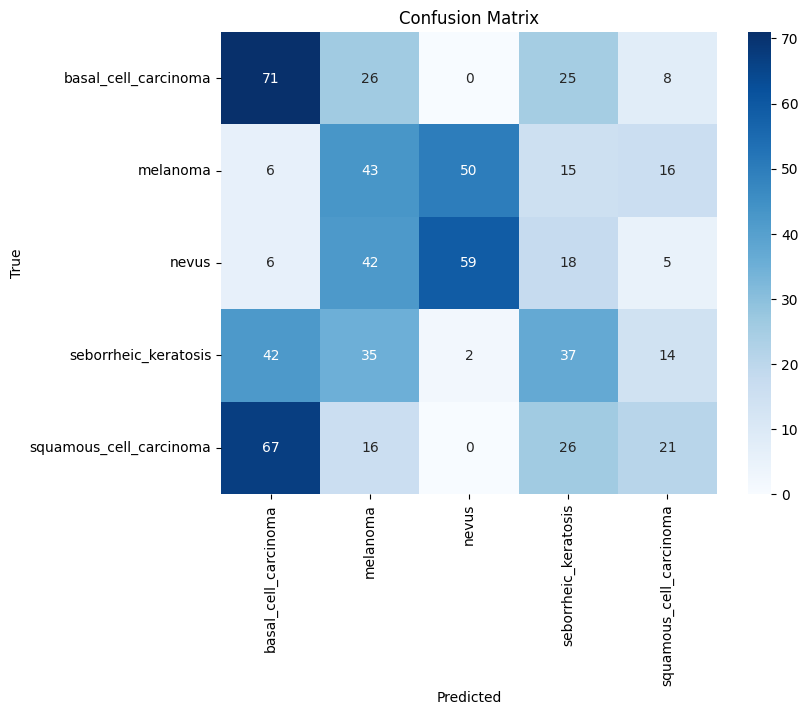

In [17]:
# prompt: imprima a matriz confusao do modelo acima

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for the test set
y_pred = AlexNet.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the test set
y_true = tf.concat([y for x, y in test_ds], axis=0).numpy()
y_true_classes = np.argmax(y_true, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

10/10 [==============================] - 0s 14ms/step


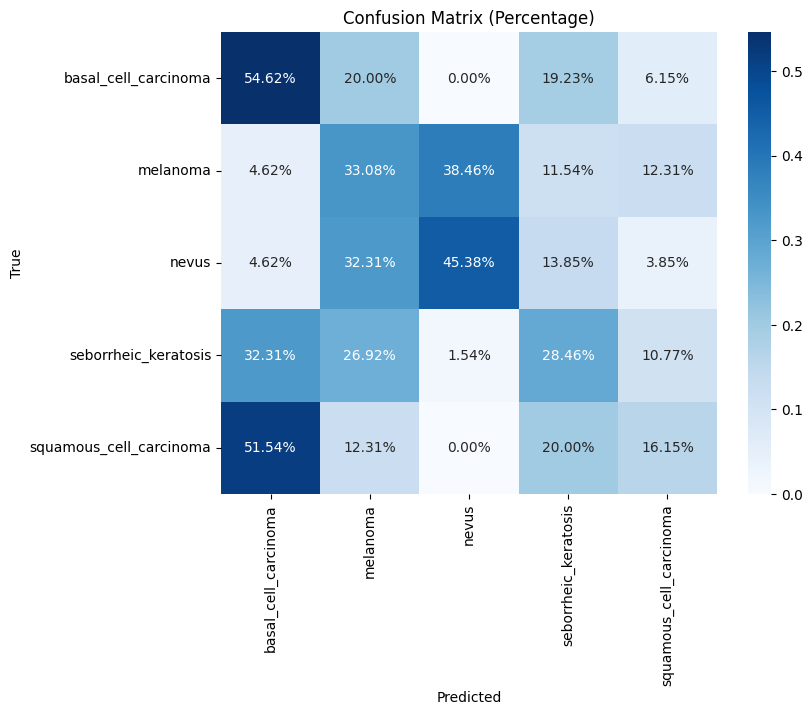

In [18]:
# prompt: gere uma matriz de confusão do treinamento acima mas com porcentagem

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions for the test set
y_pred = AlexNet.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the test set
y_true = tf.concat([y for x, y in test_ds], axis=0).numpy()
y_true_classes = np.argmax(y_true, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Normalize the confusion matrix to get percentages
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix using seaborn with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, fmt=".2%", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentage)')
plt.show()
